In [111]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/audio-dataset/Audio_Song_Actors_01-24/Actor_02/03-02-05-02-01-01-02.wav
/kaggle/input/audio-dataset/Audio_Song_Actors_01-24/Actor_02/03-02-06-01-02-02-02.wav
/kaggle/input/audio-dataset/Audio_Song_Actors_01-24/Actor_02/03-02-03-02-01-02-02.wav
/kaggle/input/audio-dataset/Audio_Song_Actors_01-24/Actor_02/03-02-03-01-02-02-02.wav
/kaggle/input/audio-dataset/Audio_Song_Actors_01-24/Actor_02/03-02-04-02-01-01-02.wav
/kaggle/input/audio-dataset/Audio_Song_Actors_01-24/Actor_02/03-02-01-01-01-01-02.wav
/kaggle/input/audio-dataset/Audio_Song_Actors_01-24/Actor_02/03-02-01-01-02-02-02.wav
/kaggle/input/audio-dataset/Audio_Song_Actors_01-24/Actor_02/03-02-04-01-01-01-02.wav
/kaggle/input/audio-dataset/Audio_Song_Actors_01-24/Actor_02/03-02-04-02-02-02-02.wav
/kaggle/input/audio-dataset/Audio_Song_Actors_01-24/Actor_02/03-02-06-02-01-01-02.wav
/kaggle/input/audio-dataset/Audio_Song_Actors_01-24/Actor_02/03-02-06-02-02-02-02.wav
/kaggle/input/audio-dataset/Audio_Song_Actors_01-24/Ac

<h1>Import Modules:</h1>

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display 
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

<h1>Load The dataset:</h1>

In [113]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split("-")[2]
        labels.append(label)
print("Label codes are Extracted")


Label codes are Extracted


In [114]:
paths[:5]

['/kaggle/input/audio-dataset/Audio_Song_Actors_01-24/Actor_02/03-02-05-02-01-01-02.wav',
 '/kaggle/input/audio-dataset/Audio_Song_Actors_01-24/Actor_02/03-02-06-01-02-02-02.wav',
 '/kaggle/input/audio-dataset/Audio_Song_Actors_01-24/Actor_02/03-02-03-02-01-02-02.wav',
 '/kaggle/input/audio-dataset/Audio_Song_Actors_01-24/Actor_02/03-02-03-01-02-02-02.wav',
 '/kaggle/input/audio-dataset/Audio_Song_Actors_01-24/Actor_02/03-02-04-02-01-01-02.wav']

In [115]:
labels[:5]

['05', '06', '03', '03', '04']

In [116]:
emotion_map = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

labels = [emotion_map.get(code, "unknown") for code in labels]
print(labels[:5])

['angry', 'fearful', 'happy', 'happy', 'sad']


In [117]:
# Creating a DataFrame:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head(5)

speech    label
0  /kaggle/input/audio-dataset/Audio_Song_Actors_...    angry
1  /kaggle/input/audio-dataset/Audio_Song_Actors_...  fearful
2  /kaggle/input/audio-dataset/Audio_Song_Actors_...    happy
3  /kaggle/input/audio-dataset/Audio_Song_Actors_...    happy
4  /kaggle/input/audio-dataset/Audio_Song_Actors_...      sad

<h1>Exploratory data Analysis:</h1>

In [118]:
# count = df['label'].value_counts()
label_counts = df['label'].value_counts().reset_index()
label_counts.columns = ['label', 'count']
print(label_counts)

       label  count
0      angry    376
1    fearful    376
2      happy    376
3        sad    376
4       calm    376
5  surprised    192
6    disgust    192
7    neutral    188


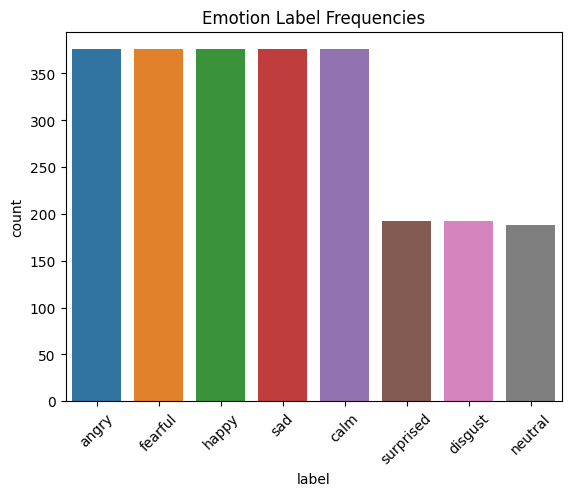

In [119]:
sns.barplot(x='label', y='count', data=label_counts)
plt.xticks(rotation=45)
plt.title("Emotion Label Frequencies")
plt.show()

In [120]:
# Oversampling (increase to the largest class size):
from sklearn.utils import resample

# Get the maximum class size
max_count = df['label'].value_counts().max()

# Oversample each class
balanced_df = pd.concat([
    resample(group, replace=True, n_samples=max_count, random_state=42)
    for _, group in df.groupby('label')
])

# Check result
print(balanced_df['label'].value_counts())

label
angry        376
calm         376
disgust      376
fearful      376
happy        376
neutral      376
sad          376
surprised    376
Name: count, dtype: int64


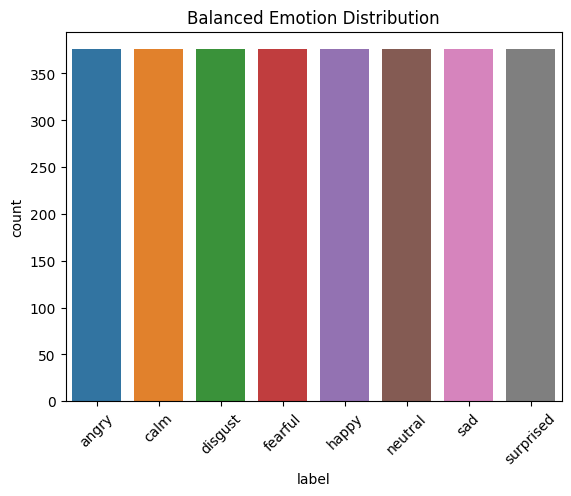

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=balanced_df['label'])
plt.xticks(rotation=45)
plt.title("Balanced Emotion Distribution")
plt.show()

In [122]:
def waveplot(data , sr , emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion , size=20)
    librosa.display.waveshow(data , sr=sr)
    plt.show()

def spectrogram(data , sr, emotion):
    # Processing the data for the spectrogram:
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    
    plt.figure(figsize=(10,4))
    plt.title(emotion , size=20)
    librosa.display.specshow(xdb , sr=sr , x_axis="time" , y_axis="hz")
    plt.colorbar()

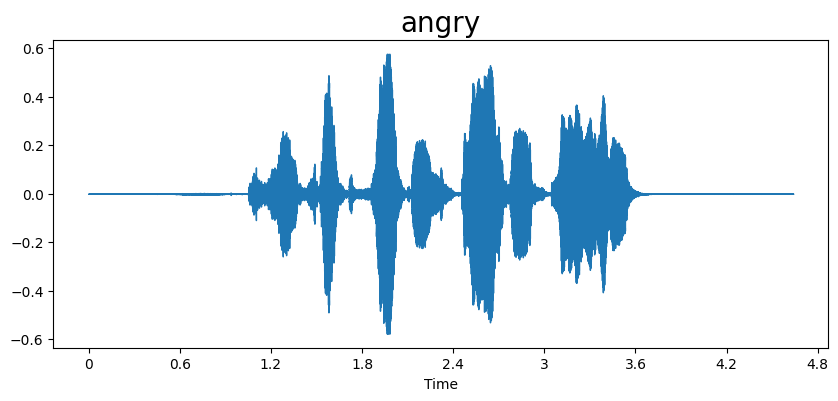

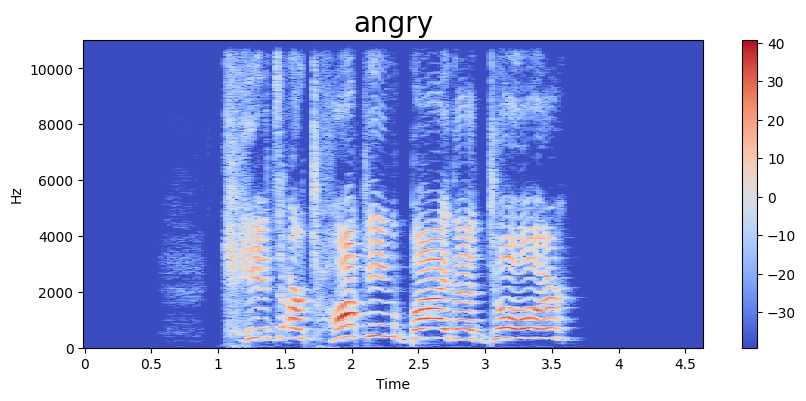

In [123]:
emotion = 'angry'
path = df['speech'][df['label'] == emotion].iloc[0]
data , sampling_rate = librosa.load(path)
waveplot(data , sampling_rate , emotion)
spectrogram(data , sampling_rate , emotion)
Audio(path)

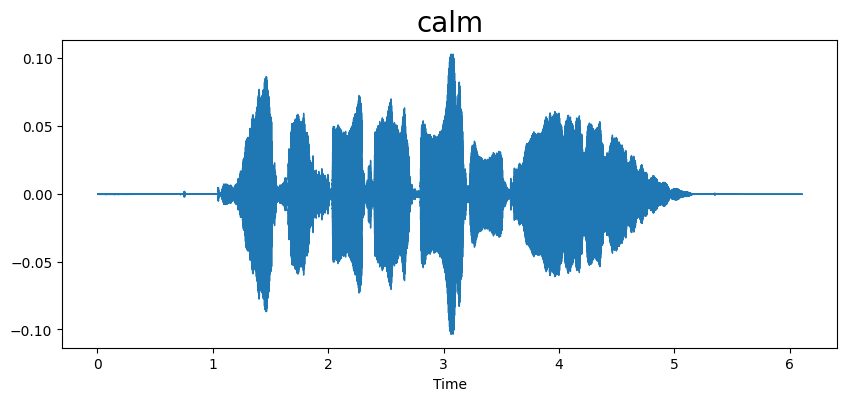

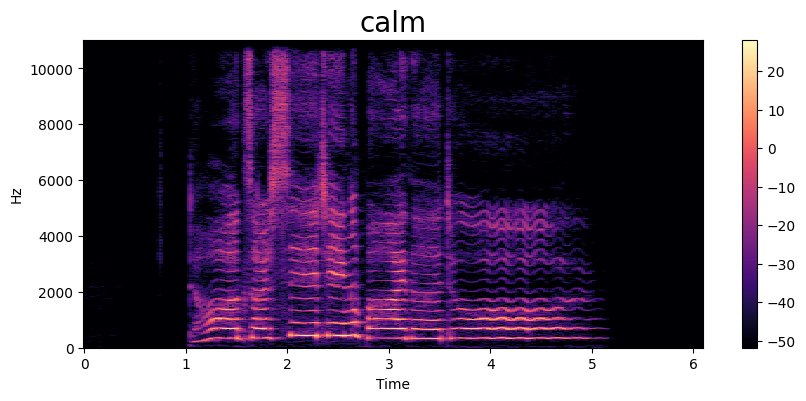

In [124]:
emotion = 'calm'
path = df['speech'][df['label'] == emotion].iloc[0]
data , sampling_rate = librosa.load(path)
waveplot(data , sampling_rate , emotion)
spectrogram(data , sampling_rate , emotion)
Audio(path)

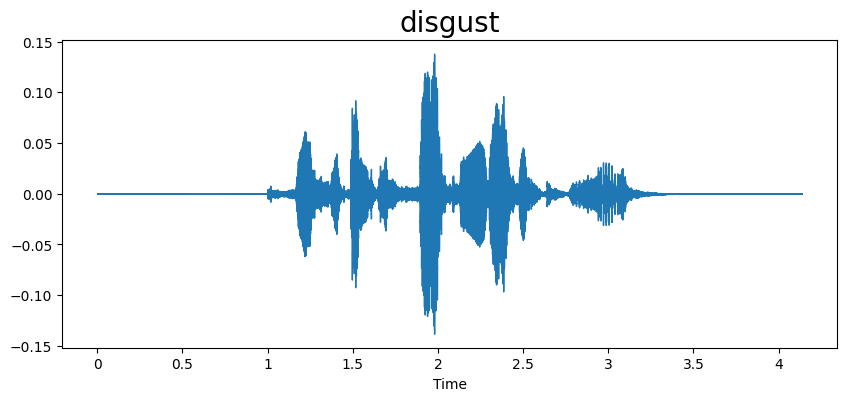

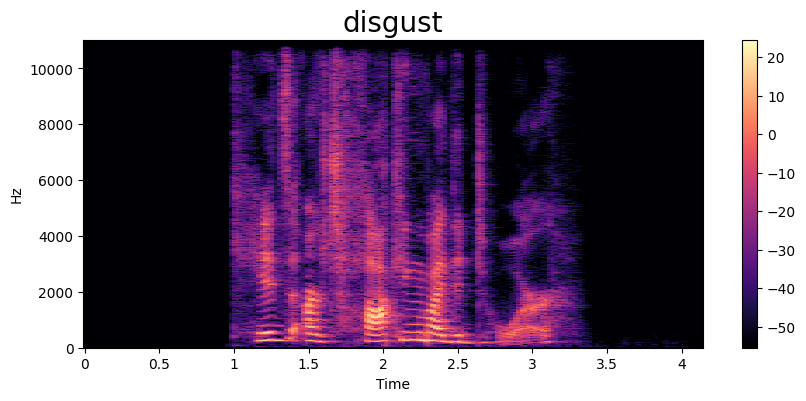

In [125]:
emotion = 'disgust'
path = df['speech'][df['label'] == emotion].iloc[0]
data , sampling_rate = librosa.load(path)
waveplot(data , sampling_rate , emotion)
spectrogram(data , sampling_rate , emotion)
Audio(path)

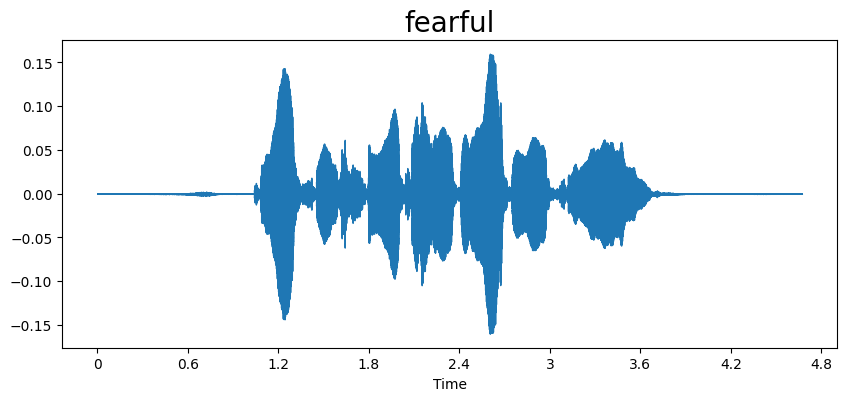

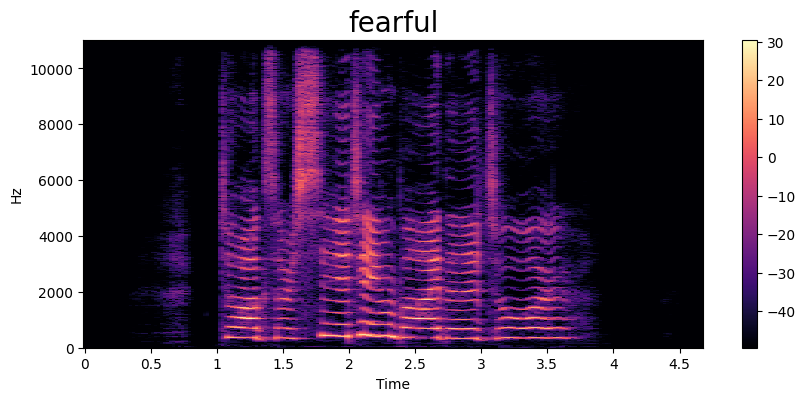

In [126]:
emotion = 'fearful'
path = df['speech'][df['label'] == emotion].iloc[0]
data , sampling_rate = librosa.load(path)
waveplot(data , sampling_rate , emotion)
spectrogram(data , sampling_rate , emotion)
Audio(path)

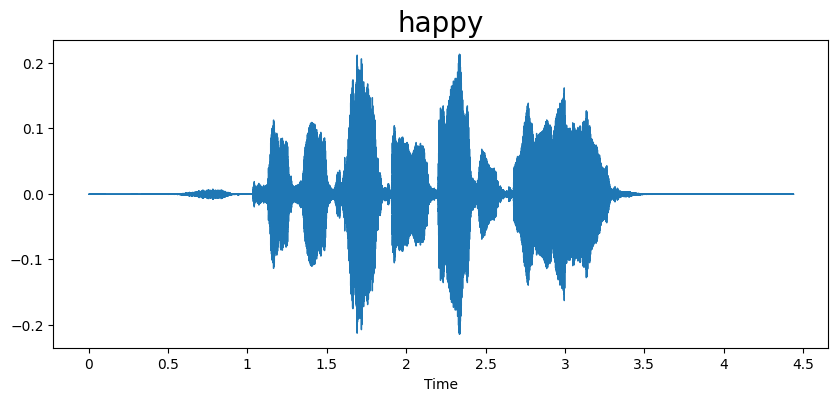

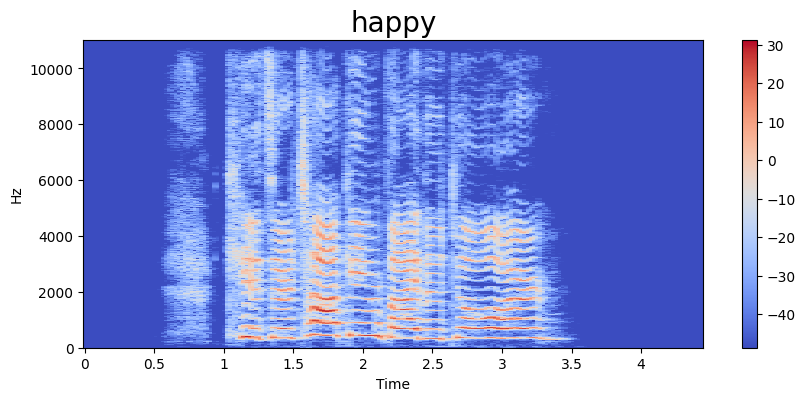

In [127]:
emotion = 'happy'
path = df['speech'][df['label'] == emotion].iloc[0]
data , sampling_rate = librosa.load(path)
waveplot(data , sampling_rate , emotion)
spectrogram(data , sampling_rate , emotion)
Audio(path)

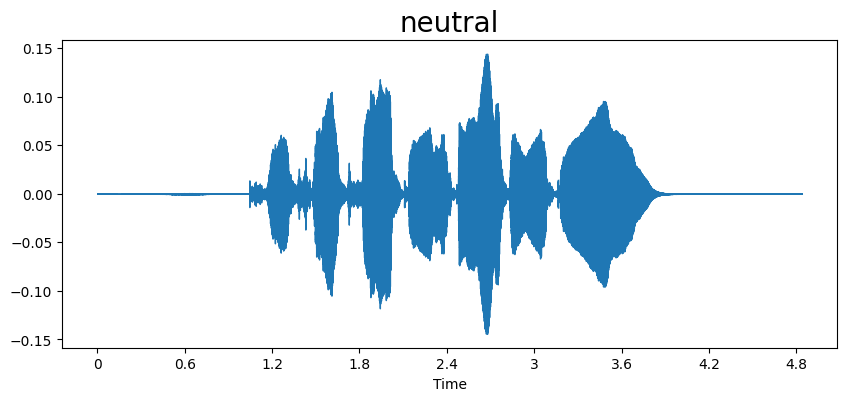

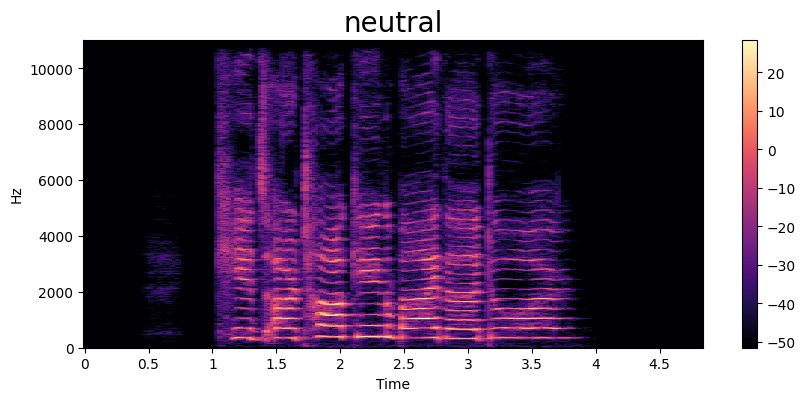

In [128]:
emotion = 'neutral'
path = df['speech'][df['label'] == emotion].iloc[0]
data , sampling_rate = librosa.load(path)
waveplot(data , sampling_rate , emotion)
spectrogram(data , sampling_rate , emotion)
Audio(path)

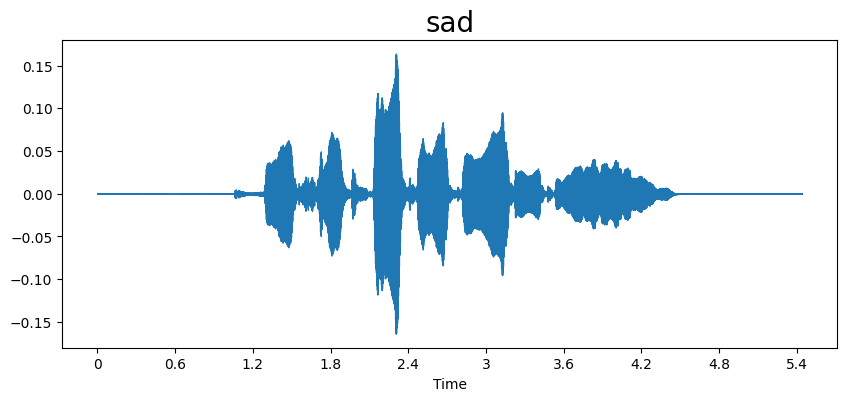

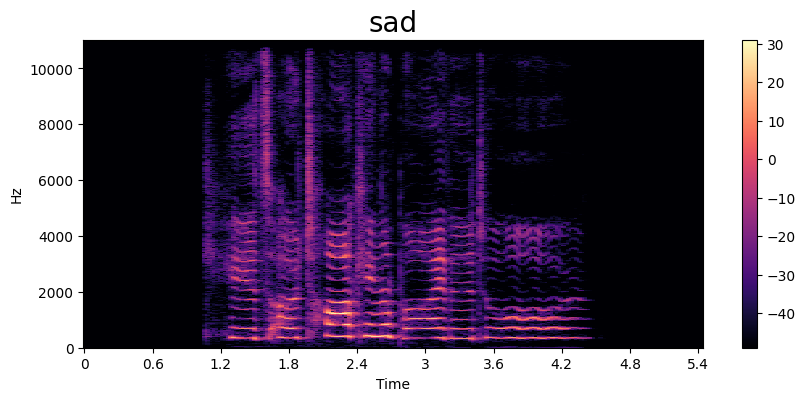

In [129]:
emotion = 'sad'
path = df['speech'][df['label'] == emotion].iloc[0]
data , sampling_rate = librosa.load(path)
waveplot(data , sampling_rate , emotion)
spectrogram(data , sampling_rate , emotion)
Audio(path)

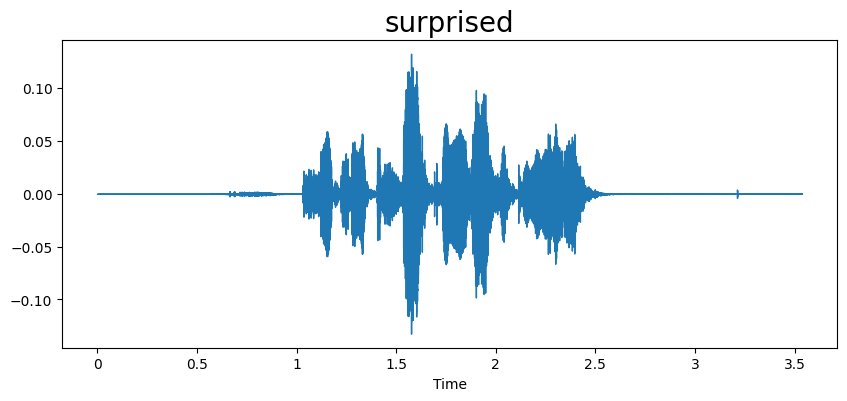

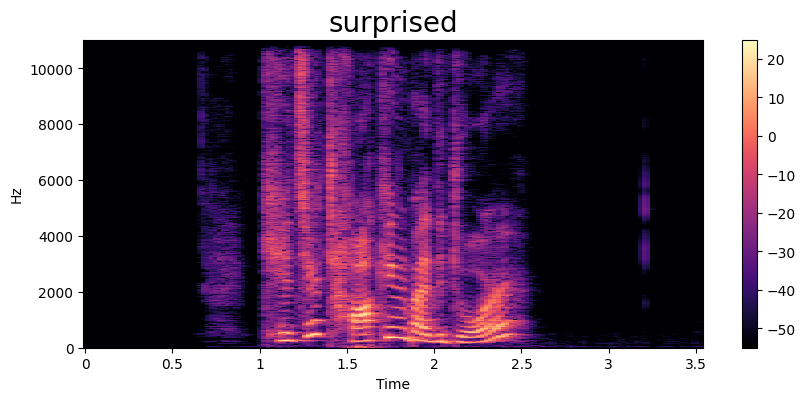

In [130]:
emotion = 'surprised'
path = df['speech'][df['label'] == emotion].iloc[0]
data , sampling_rate = librosa.load(path)
waveplot(data , sampling_rate , emotion)
spectrogram(data , sampling_rate , emotion)
Audio(path)

<h1>Feature Extraction:</h1>

In [162]:
# def extract_mfcc(filename):
#     y , sr =librosa.load(filename , duration=4 , offset=0.5)
#     mfcc = np.mean(librosa.feature.mfcc(y=y , sr=sr , n_mfcc=40).T, axis=0)
#     return mfcc

def extract_features(filename, max_len=173):  # 173 = ~4 sec of 40ms frames
    try:
        y, sr = librosa.load(filename, duration=4, offset=0.5)

        # Extract features
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
        delta = librosa.feature.delta(mfcc)
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)

        # Combine all features
        combined = np.vstack([mfcc, delta, chroma, zcr])  # shape: (features, time)
        combined = combined.T  # shape: (time, features)

        # Pad or truncate to fixed length
        if combined.shape[0] < max_len:
            pad_width = max_len - combined.shape[0]
            combined = np.pad(combined, ((0, pad_width), (0, 0)), mode='constant')
        else:
            combined = combined[:max_len, :]

        return combined  # shape: (max_len, feature_dim)

    except Exception as e:
        print(f"Error processing {filename}: {e}")
        return np.zeros((max_len, 43))  # fallback: 43 = 40 MFCC + delta + 12 chroma + 1 ZCR

In [163]:
extract_mfcc(df['speech'][0])

array([-373.76767   ,   30.972961  ,  -42.27326   ,    6.0492916 ,
        -20.283226  ,  -17.447912  ,    6.1876974 ,  -19.143255  ,
         -8.734622  ,   -3.8585792 ,  -10.305822  ,   -2.5640051 ,
        -10.710603  ,   -0.9328694 ,  -11.388432  ,   -6.6953225 ,
         -6.888438  ,    0.8264837 ,    3.8170872 ,   13.429832  ,
         16.407747  ,   11.342643  ,    5.7692385 ,    0.5665827 ,
         -5.841202  ,   -0.42022133,    3.460535  ,    2.4220757 ,
         -1.2157075 ,   -7.715994  ,   -2.9386654 ,    5.2204394 ,
          1.8216211 ,   -3.038321  ,   -3.2886653 ,    1.6420052 ,
         -1.1152521 ,   -2.318734  ,    1.0740173 ,    7.820852  ],
      dtype=float32)

In [164]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [165]:
X_mfcc

0       [-373.76767, 30.972961, -42.27326, 6.0492916, ...
1       [-507.61542, 26.265524, -34.239433, 5.8747926,...
2       [-483.02237, 26.61609, -45.364883, 7.360539, -...
3       [-519.5499, 32.863583, -38.566956, 4.3321123, ...
4       [-517.08844, 42.610157, -28.16072, -2.2831933,...
                              ...                        
2447    [-602.2857, 62.59409, -8.662006, 8.928019, 5.6...
2448    [-483.65097, 55.61101, -1.4032465, 15.2517605,...
2449    [-589.7703, 77.72108, -3.810156, 14.251601, 11...
2450    [-538.88324, 58.58721, 20.90767, 17.708559, 4....
2451    [-338.42288, 37.881447, -14.309887, 13.471861,...
Name: speech, Length: 2452, dtype: object

In [166]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2452, 40)

In [167]:
X = np.expand_dims(X, -1)
X.shape

(2452, 40, 1)

In [168]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(df[['label']])

In [169]:
y = y.toarray()

In [170]:
y.shape

(2452, 8)

<h1>Create the LSTM model:</h1> 

In [180]:
# from keras.models import Sequential
# from keras.layers import Dense, LSTM, Dropout

# model = Sequential([
#     LSTM(123, return_sequences=False, input_shape=(200, 1)),
#     Dense(64, activation='relu'),
#     Dropout(0.2),
#     Dense(32, activation='relu'),
#     Dropout(0.2),
#     Dense(8, activation='softmax')  # 8 classes for emotions
# ])

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()



from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization

model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(64),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='softmax')
])

# Compile
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()





Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_19 (LSTM)                       │ (None, 40, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 40, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_42 (Dropout)                 │ (None, 40, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_20 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_43 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_44 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_45 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133,832 (522.78 KB)

 Trainable params: 133,448 (521.28 KB)

 Non-trainable params: 384 (1.50 KB)

In [181]:
# ✅ NEW: Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Train and test sets created:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)

✅ Train and test sets created:
X_train: (1961, 40, 1)
X_test : (491, 40, 1)


In [184]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    # EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
    # ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200,
    batch_size=64,
    # callbacks=callbacks,
    shuffle=True
)

Epoch 1/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8522 - loss: 0.4424 - val_accuracy: 0.6151 - val_loss: 1.3788
Epoch 2/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8445 - loss: 0.4649 - val_accuracy: 0.6029 - val_loss: 1.4817
Epoch 3/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8223 - loss: 0.4749 - val_accuracy: 0.6497 - val_loss: 1.3871
Epoch 4/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8409 - loss: 0.4338 - val_accuracy: 0.6212 - val_loss: 1.3454
Epoch 5/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8310 - loss: 0.4533 - val_accuracy: 0.6314 - val_loss: 1.4010
Epoch 6/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8351 - loss: 0.4648 - val_accuracy: 0.6456 - val_loss: 1.3775
Epoch 7/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8447 - loss: 0.4091 - val_accuracy: 0.6538 - val_loss: 1.4037
Epoch 8/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8687 - loss: 0.3833 - val_accuracy: 0.

<h1>Plot the results:</h1>

ValueError: x and y must have same first dimension, but have shapes (100,) and (10,)

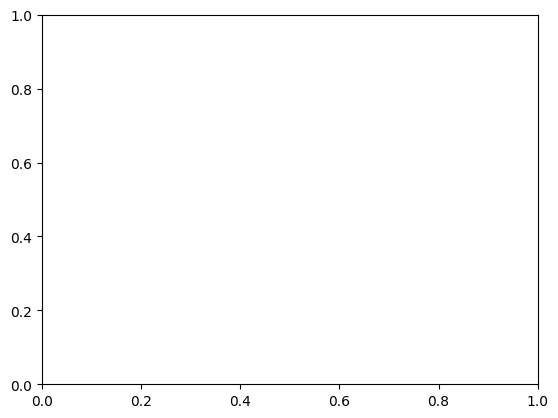

In [156]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs , acc , label="train accuracy")
plt.plot(epochs , val_acc , label="val accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs , acc , label="train accuracy")
plt.plot(epochs , val_acc , label="val accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


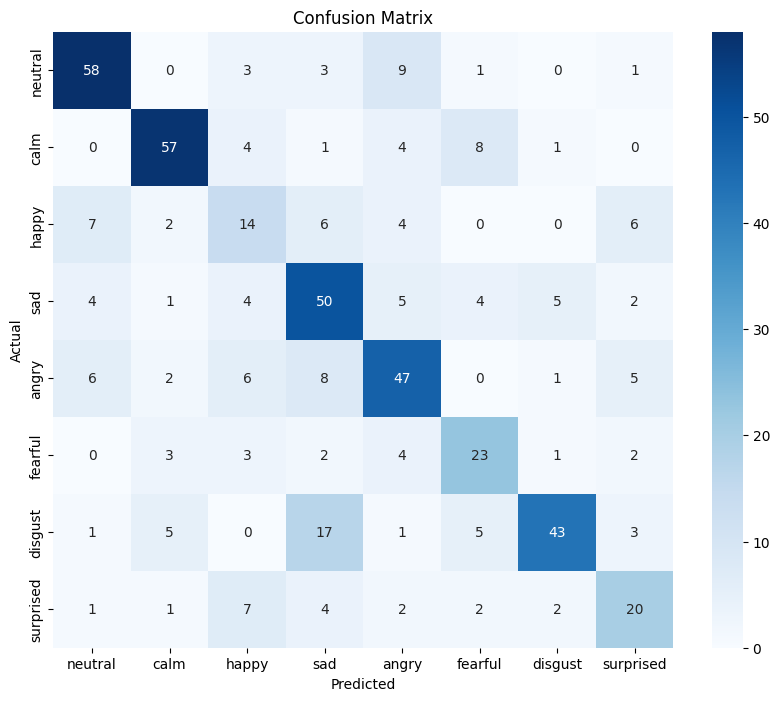


✅ Overall Accuracy: 63.54%
✅ Macro F1 Score: 60.89%

🎯 Per-Class Accuracy:
neutral: 77.33%
calm: 76.00%
happy: 35.90%
sad: 66.67%
angry: 62.67%
fearful: 60.53%
disgust: 57.33%
surprised: 51.28%

🔍 Evaluation Results:
❌ Overall accuracy < 80% ❗
❌ F1 Score < 80% ❗
❌ At least one class accuracy < 75% ❗


In [185]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, class_labels):
    # Predict probabilities
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot Confusion Matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Overall Accuracy
    overall_acc = accuracy_score(y_true, y_pred)
    print(f"\n✅ Overall Accuracy: {overall_acc*100:.2f}%")

    # F1 Score (macro)
    f1 = f1_score(y_true, y_pred, average='macro')
    print(f"✅ Macro F1 Score: {f1*100:.2f}%")

    # Per-class accuracy
    print("\n🎯 Per-Class Accuracy:")
    class_accuracies = cm.diagonal() / cm.sum(axis=1)
    for i, acc in enumerate(class_accuracies):
        label = class_labels[i]
        print(f"{label}: {acc*100:.2f}%")

    # ✅ Check evaluation thresholds
    print("\n🔍 Evaluation Results:")
    if overall_acc < 0.80:
        print("❌ Overall accuracy < 80% ❗")
    else:
        print("✅ Overall accuracy meets requirement")

    if f1 < 0.80:
        print("❌ F1 Score < 80% ❗")
    else:
        print("✅ F1 Score meets requirement")

    if any(acc < 0.75 for acc in class_accuracies):
        print("❌ At least one class accuracy < 75% ❗")
    else:
        print("✅ All class accuracies meet requirement")

    return {
        "f1_score": f1,
        "overall_accuracy": overall_acc,
        "per_class_accuracies": class_accuracies
    }

# Example class labels if you have 8 classes:
class_labels = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']

# Call evaluation
metrics = evaluate_model(model, X_test, y_test, class_labels)
